In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F65711%2F7405009%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240216%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240216T223535Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9633853039fb9c2f19872653b40a99f6a87cb23a3aa000ff4de5238b09ba022ab770596e19cfc002fb17f3269802f2dc843cf479ee7f0d8a7939814317a18b0d6f60232d5372c9ddbfb0b813d6d5c3114ef0a367c9a3dd1feb9480250c3be71b679204fc2c2df442b3fc2d8fc18c77730f1a51d4bb599aaf314adf58f9202da248cc57358a2bd8dc74ee4d2a1ec15a3b0c5cf611c8a978816499881132d20f6edb9df67118bac79cbd6076463e991e2868e1096ebfb5716dbd72e8ccaa66511eea755774cf60fd3a54bda93807ae82a387ad9d5dff2d0c4887a832efd7fee26a7eeee932f333324d37c513283b3421a75286220d68e76b265a68b713eb37bde3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 7141098 bytes downloaded
Downloaded and uncompressed: playground-series-s4e1
Data source import complete.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from numpy import unique

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid



from tensorflow import zeros
from tensorflow.data import Dataset
from tensorflow.keras import Sequential, backend
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Input
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Dense, Activation, Reshape, Dropout, Input, Flatten, Concatenate


import seaborn as sns
from keras.utils import plot_model
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix




import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping




from sklearn.impute import SimpleImputer
from keras.models import Sequential, Model
from keras.layers import Embedding
# from keras.layers.embeddings import Embedding


from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from keras.layers import Dense, Activation, Reshape, Dropout, Input, Flatten, Concatenate


## EDA

In [3]:
trainbanking = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
trainbanking.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
trainbanking.shape

(165034, 14)

In [5]:
testbanking = pd.read_csv(r'/kaggle/input/playground-series-s4e1/test.csv')
testbanking.head()


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [6]:
testbanking.shape

(110023, 13)

In [7]:
trainbanking.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

In [8]:
# convert some columns to objects
#df['column_name'] = df['column_name'].astype(str)
trainbanking['Tenure'] = trainbanking['Tenure'].astype(str)
testbanking['Tenure'] = testbanking['Tenure'].astype(str)

In [9]:
# convert some columns to objects
#df['column_name'] = df['column_name'].astype(str)
trainbanking['NumOfProducts'] = trainbanking['NumOfProducts'].astype(str)
testbanking['NumOfProducts'] = testbanking['NumOfProducts'].astype(str)

In [10]:
trainbanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  object 
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  object 
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 17.6+ MB


In [11]:
trainbanking.drop(['id', 'CustomerId','Surname'], axis = 1, inplace = True)
testbanking_id = testbanking[['id']].copy()
testbanking.drop(['id', 'CustomerId' ,'Surname'],axis = 1, inplace = True)

In [12]:
trainbanking.shape,testbanking.shape
#,testbanking_id.shape

((165034, 11), (110023, 10))

In [13]:
trainbanking.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

target = ['Exited']

In [15]:
ab = round(trainbanking.shape[0] * 0.7)
ab

115524

In [16]:
ac = len(trainbanking) - ab
ac

49510

In [17]:
X_train, y_train = trainbanking.iloc[:ab][features], trainbanking.iloc[:ab][target]
X_test, y_test = trainbanking.iloc[ab:][features], trainbanking.iloc[ab:][target]


In [18]:
num_cols=[i for i in X_train.select_dtypes(exclude=['object'])]
num_cols

['CreditScore',
 'Age',
 'Balance',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [19]:
len(num_cols)

6

In [20]:
scaler = StandardScaler().fit(X_train[num_cols])
X_train.loc[:,num_cols] = scaler.transform(X_train[num_cols])
#X_val.loc[:,num_cols] = scaler.transform(X_val[num_cols])
X_test.loc[:,num_cols] = scaler.transform(X_test[num_cols])
testbanking.loc[:, num_cols] = scaler.transform(testbanking[num_cols])

In [21]:
col_vals_dict = {c: list(X_train[c].unique()) for c in X_train.columns if X_train[c].dtype == object}
#col_vals_dict

In [22]:
nb_numeric   = len(X_train.columns) - len(col_vals_dict)
nb_categoric = len(col_vals_dict)
print('Number of Numerical features:', nb_numeric)
print('Number of Categorical features:', nb_categoric)


Number of Numerical features: 6
Number of Categorical features: 4


In [23]:
embed_cols = []
non_embed_cols = []
len_embed_cols = []
for c in col_vals_dict:
    if len(col_vals_dict[c])>2:
        embed_cols.append(c)
        len_embed_cols.append(len(col_vals_dict[c]))
        print(c + ': %d values' % len(col_vals_dict[c])) #look at value counts to know the embedding dimensions(

    else:
      non_embed_cols.append(c)
      print(c + ': %d values' % len(col_vals_dict[c]))

print('\n Number of embed features :', len(embed_cols))


Geography: 3 values
Gender: 2 values
Tenure: 11 values
NumOfProducts: 4 values

 Number of embed features : 3


In [24]:
myself = embed_cols + non_embed_cols
len(myself)

4

In [25]:
#converting data to list format to match the network structure
def preproc(X_train, X_test):

    input_list_train = []
#    input_list_val = []
    input_list_test = []

    #the cols to be embedded: rescaling to range [0, # values)
    for c in embed_cols:
        raw_vals = np.unique(X_train[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i
        input_list_train.append(X_train[c].map(val_map).values)
#        input_list_val.append(X_val[c].map(val_map).fillna(0).values)
        input_list_test.append(X_test[c].map(val_map).fillna(0).values)

    #the rest of the columns
    other_cols = [c for c in X_train.columns if (not c in (myself))]
    input_list_train.append(X_train[other_cols].values)
#    input_list_val.append(X_val[other_cols].values)
    input_list_test.append(X_test[other_cols].values)

    return input_list_train, input_list_test

In [26]:
X_train_list,X_test_list = preproc(X_train, X_test)

In [27]:
len_embed_cols

[3, 11, 4]

In [28]:
model_out = []
model_in  = []

for dim in len_embed_cols:

#     Define the embedding_size
#    no_of_unique_cat  = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((dim)/2), 50 ))

    input_dim = Input(shape=(1,), dtype='int32')
    embed_dim = Embedding(dim, embedding_size, input_length=1)(input_dim)
    embed_dim = Dropout(0.25)(embed_dim)
    embed_dim = Reshape((embedding_size,))(embed_dim)
    model_out.append(embed_dim)
    model_in.append(input_dim)

input_num = Input(shape=(6,), dtype='float32')
embedding_numeric = Dense(16)(input_num)
model_in.append(input_num)
model_out.append(embedding_numeric)

#    outputs = Concatenate(axis=1)([*model_out, input_num])
output = Concatenate()(model_out)
outputs = (Dense(128))(output)
outputs = (Activation('relu'))(outputs)
outputs = (Dropout(.35))(outputs)
outputs = (Dense(64))(outputs)
outputs = (Activation('relu'))(outputs)
outputs = (Dropout(.15))(outputs)
outputs = (Dense(32))(outputs)
outputs = (Activation('relu'))(outputs)
outputs = (Dropout(.15))(outputs)
outputs = (Dense(1))(outputs)
outputs = (Activation('sigmoid'))(outputs)

model = Model(model_in, outputs)

#    model = Model([*model_in, input_num], outputs)

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse','mape'])



model.compile(optimizer = SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=[AUC()])
#    return model

In [29]:
callback = EarlyStopping(monitor='val_auc', patience=5)
history = model.fit(X_train_list, y_train, epochs=1000, batch_size=250, validation_split=0.1, callbacks=[callback], verbose=2)

Epoch 1/1000
416/416 - 5s - loss: 0.5391 - auc: 0.5661 - val_loss: 0.4711 - val_auc: 0.7299 - 5s/epoch - 12ms/step
Epoch 2/1000
416/416 - 4s - loss: 0.4665 - auc: 0.7263 - val_loss: 0.4450 - val_auc: 0.7628 - 4s/epoch - 10ms/step
Epoch 3/1000
416/416 - 3s - loss: 0.4475 - auc: 0.7591 - val_loss: 0.4343 - val_auc: 0.7740 - 3s/epoch - 8ms/step
Epoch 4/1000
416/416 - 3s - loss: 0.4394 - auc: 0.7685 - val_loss: 0.4289 - val_auc: 0.7786 - 3s/epoch - 8ms/step
Epoch 5/1000
416/416 - 4s - loss: 0.4334 - auc: 0.7742 - val_loss: 0.4260 - val_auc: 0.7806 - 4s/epoch - 9ms/step
Epoch 6/1000
416/416 - 3s - loss: 0.4315 - auc: 0.7754 - val_loss: 0.4242 - val_auc: 0.7820 - 3s/epoch - 8ms/step
Epoch 7/1000
416/416 - 3s - loss: 0.4285 - auc: 0.7784 - val_loss: 0.4225 - val_auc: 0.7836 - 3s/epoch - 8ms/step
Epoch 8/1000
416/416 - 4s - loss: 0.4262 - auc: 0.7804 - val_loss: 0.4205 - val_auc: 0.7857 - 4s/epoch - 9ms/step
Epoch 9/1000
416/416 - 4s - loss: 0.4242 - auc: 0.7823 - val_loss: 0.4180 - val_auc: 0

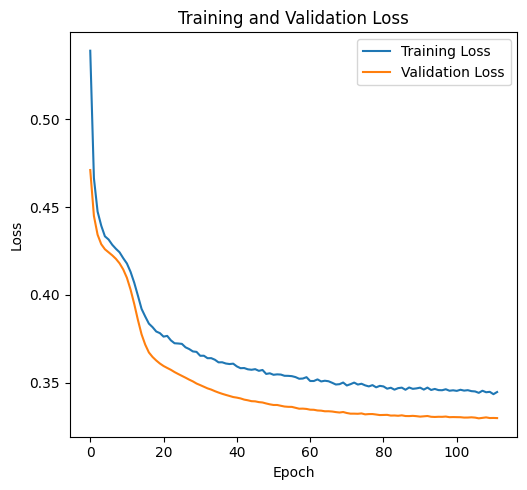

In [30]:
# Extract training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
#train_auc = history.history['auc']
#val_auc = history.history['val_auc']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
#plt.subplot(1, 2, 2)
#plt.plot(train_auc, label='Training AUC')
#plt.plot(val_auc, label='Validation AUC')
#plt.title('Training and Validation AUC')
#plt.xlabel('Epoch')
#plt.ylabel('AUC')
#plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [31]:
# Evaluating the model on test dataset
test_loss, test_auc = model.evaluate(X_test_list, y_test)
print(f'Test AUC: {test_auc}')

1548/1548 [==============================] - 3s 2ms/step - loss: 0.3327 - auc: 0.8809
Test AUC: 0.8809009790420532


### Predict testset

In [32]:
#converting data to list format to match the network structure
def preproc(testbanking):

    input_list_testbank = []
#    input_list_val = []
#    input_list_test = []

    #the cols to be embedded: rescaling to range [0, # values)
    for c in embed_cols:
        raw_vals = np.unique(testbanking[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i
#        input_list_train.append(X_train[c].map(val_map).values)
#        input_list_val.append(X_val[c].map(val_map).fillna(0).values)
#        input_list_test.append(X_test[c].map(val_map).fillna(0).values)
        input_list_testbank.append(testbanking[c].map(val_map).values)
    #the rest of the columns
#    other_cols = [c for c in X_train.columns if (not c in (myself))]
    other_cols = [c for c in testbanking.columns if (not c in (myself))]
    input_list_testbank.append(testbanking[other_cols].values)
#    input_list_val.append(X_val[other_cols].values)
#    input_list_test.append(X_test[other_cols].values)

    return input_list_testbank

In [33]:
proc_testbank = preproc(testbanking)

In [34]:
# Predicting the test set data points
preds = model.predict(proc_testbank)

3439/3439 [==============================] - 6s 2ms/step


In [35]:
testbanking_id['Exited'] = preds
testbanking_id.head()

,id,Exited
0,165034,0.010580
1,165035,0.755437
2,165036,0.027893
3,165037,0.275032
4,165038,0.467917


In [36]:
# Saving final outcome file
testbanking_id.to_csv("submission.csv", index = False)

### Reference

https://www.kaggle.com/code/vaibhavbawej07/neural-networks-binaryclassification-accuracy-88-2